A Face Detection Pipeline	
    HOG Features --> done
	HOG in Action: A Simple Face Detector -> Mini project
	Caveats and Improvements -> Mini project
Introducing Linear Regression	
    Linear regression models
	Fitted Regression Model
	Ordinary Least Square Regression Model


A Face Detection 

1. Less quality -> Nosiy data
2. Missing features

Machine Learning (Classification)
Feature Engineering - FE 
Histogram of Oriented Gradients (HOG) -> Transform Image pixels to vector reperesentations

HOG Features:

HOG involves the following steps:

1.Optionally pre-normalize images. This leads to features that resist dependence on variations in illumination.
2.Convolve the image with two filters that are sensitive to horizontal and vertical brightness gradients. These capture edge, contour, and texture information.
3.Subdivide the image into cells of a predetermined size, and compute a histogram of the gradient orientations within each cell.
4.Normalize the histograms in each cell by comparing to the block of neighboring cells. This further suppresses the effect of illumination across the image.
5.Construct a one-dimensional feature vector from the information in each cell.

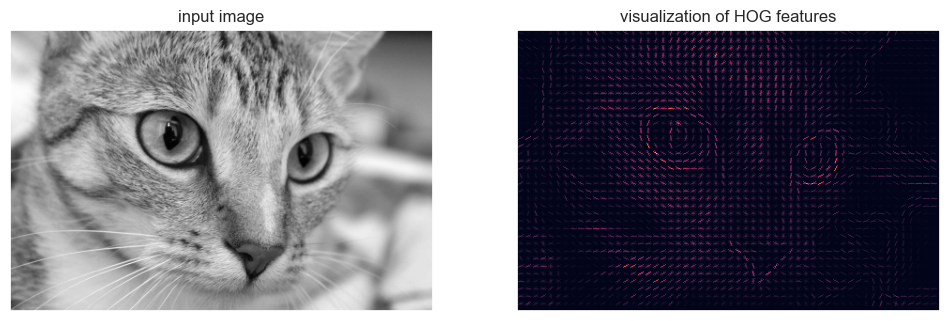

In [4]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

HOG in Action: A Simple Face Detector: 
It will follow SVM 
1.Obtain a set of image thumbnails of faces to constitute "positive" training samples.
2.Obtain a set of image thumbnails of non-faces to constitute "negative" training samples.
3.Extract HOG features from these training samples.
4.Train a linear SVM classifier on these samples.
5.For an "unknown" image, pass a sliding window across the image, using the model to evaluate whether that window contains a face or not.
6.If detections overlap, combine them into a single window.


In [6]:
#1.Obtain a set of image thumbnails of faces to constitute "positive" training samples.

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(download_if_missing=True)
positive_patches = faces.images
print(positive_patches.shape)

(7007, 62, 47)


In [ ]:
from skimage import data,color, transform
import imageio 
imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
for name in imgs_to_use:
    image = color.rgb2gray(name)
    #images = color.rgb2gray(getattr(data, n)())

Introducing Linear Regression 
    Linear regression models 
	Fitted Regression Model
     1.R-squared
     2.Overall F-test
     3.Root Mean Square Error (RMSE)
     
     a.Sum of Squares Total (SST) 
     b.Sum of Squares Error (SSE)
	Ordinary Least Square Regression Model

#R-squared
R-squared is a statistical measure that represents the goodness of fit of a regression model
R-squared is the percentage of the dependent variable variation that a linear model explains

R^2= Variance explaind by model / Total Variance
  = SS regression / SS total 
  
  
0 indicates that the response variable cannot be explained by the predictor variable at all.
1 indicates that the response variable can be perfectly explained without error by the predictor variables.


1.R-squared (R2), which is the proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model.

2.Root Mean Squared Error (RMSE), which measures the average error performed by the model in predicting the outcome for an observation. Mathematically, the RMSE is the square root of the mean squared error (MSE), which is the average squared difference between the observed actual outome values and the values predicted by the model. So, MSE = mean((observeds - predicteds)^2) and RMSE = sqrt(MSE). The lower the RMSE, the better the model.

3.Residual Standard Error (RSE), also known as the model sigma, is a variant of the RMSE adjusted for the number of predictors in the model. The lower the RSE, the better the model. In practice, the difference between RMSE and RSE is very small, particularly for large multivariate data.

4.Mean Absolute Error (MAE), like the RMSE, the MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

4 other important metrics:
1.AIC stands for (Akaike’s Information Criteria), a metric developped by the Japanese Statistician, Hirotugu Akaike, 1970. The basic idea of AIC is to penalize the inclusion of additional variables to a model. It adds a penalty that increases the error when including additional terms. The lower the AIC, the better the model.
2.AICc is a version of AIC corrected for small sample sizes.
3.BIC (or Bayesian information criteria) is a variant of AIC with a stronger penalty for including additional variables to the model.
4.Mallows Cp: A variant of AIC developed by Colin Mallows.

In [14]:
import pandas as pd
df = pd.DataFrame({'hours': [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4, 3, 6],
                   'exams': [1, 3, 3, 5, 2, 2, 1, 1, 0, 3, 4, 3, 2],
                   'score': [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90, 75, 96]})
print(df)

    hours  exams  score
0       1      1     76
1       2      3     78
2       2      3     85
3       4      5     88
4       2      2     72
5       1      2     69
6       5      1     94
7       4      1     94
8       2      0     88
9       4      3     92
10      4      4     90
11      3      3     75
12      6      2     96


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X, y = df[["hours", "exams"]], df.score
model.fit(X, y)
r_squared = model.score(X, y)
print(r_squared)


0.71755417141059


In [11]:
pip install statsmodels 

  Using cached statsmodels-0.13.5-cp311-cp311-win_amd64.whl (9.0 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import statsmodels.api as sm

In [23]:
y = df['score']
x = df[['hours', 'exams']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit() #Ordinary Least Square Regression Model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     12.70
Date:                Mon, 27 Feb 2023   Prob (F-statistic):            0.00180
Time:                        14:59:46   Log-Likelihood:                -38.618
No. Observations:                  13   AIC:                             83.24
Df Residuals:                      10   BIC:                             84.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4048      4.001     17.847      0.0

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Clustering and Classfication	
    Clustering Algorithms
	Classification Algorithms
	Similarity Metrics

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


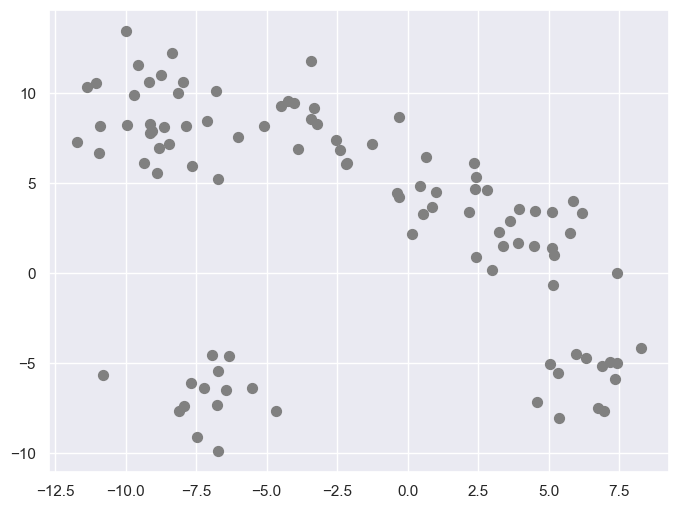

In [26]:
#Clustering
#1.Kmeans
#2.Gauusian Mixture ALgo
#3.Scikit learn clustering algo

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#creating a dataset 
X, y = make_blobs(n_samples=100, centers=7,
                  random_state=42, cluster_std=1.5)
#fit the kmeans
model = KMeans(4, random_state=0)

#predict
y = model.fit_predict(X)

#visual
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

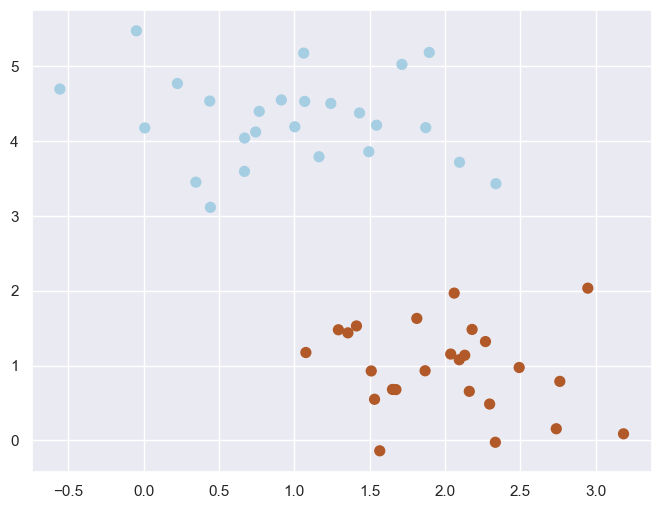

In [27]:
#Classification Algorithms

#Implemetation
from sklearn.datasets import make_blobs
from sklearn.svm import SVC # Support Vector Classifier model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Binary Large Object
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60) 
#Fitting the svc m
clf=SVC(kernel='linear')
clf.fit(X,y)

#creating new points to predict 
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)

X2 = X2[50:] 
#Predict
y2=clf.predict(X2)

#Visualization
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

#Similarity Metrics -> Finding the similarity of two data using charactertics distance , size and other features ..

Euclidean Distance
Manhattan Distance
Minkowski Distance
Hamming Distance